In [71]:
import pandas as pd
import os
os.chdir("C:\\Users\\admin\\Desktop\\code")
first = pd.read_csv("projeect -2.csv")

print(first)

          country  adjusted_satisfaction  avg_satisfaction  std_satisfaction  \
0         Armenia                   37.0               4.9              2.42   
1          Angola                   26.0               4.3              3.19   
2       Argentina                   60.0               7.1              1.91   
3         Austria                   59.0               7.2              2.11   
4       Australia                   65.0               7.6              1.80   
..            ...                    ...               ...               ...   
106       Uruguay                   58.0               7.0              2.13   
107       Vietnam                   53.0               6.1              1.77   
108  South Africa                   49.0               6.3              2.47   
109        Zambia                   37.0               5.0              2.61   
110      Zimbabwe                   33.0               4.1              2.16   

     avg_income  median_income  income_

In [72]:
happy = first['happyScore']
income = first['avg_income']
ineq = first['income_inequality']
income.max()

26182.275

In [73]:
first.sort_values('avg_income', inplace=True)
first

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
10,Burundi,25.0,2.9,1.96,572.880,436.92,33.360000,'Sub-Saharan Africa',2.905,0.01530,Burundi
65,Madagascar,33.0,3.7,1.86,574.200,415.48,40.720000,'Sub-Saharan Africa',3.681,0.20824,Madagascar
58,Liberia,37.0,4.4,2.02,653.040,528.72,36.480000,'Sub-Saharan Africa',4.571,0.07120,Liberia
72,Mozambique,34.0,3.8,1.76,714.720,488.52,45.580000,'Sub-Saharan Africa',4.971,0.08308,Mozambique
73,Niger,34.0,3.8,1.75,718.400,535.56,37.726667,'Sub-Saharan Africa',3.845,0.06940,Niger
...,...,...,...,...,...,...,...,...,...,...,...
16,Canada,69.0,8.0,1.71,20190.780,16829.10,33.790000,'North America',7.427,1.32629,Canada
77,Norway,70.0,8.0,1.62,21877.710,19477.62,27.307500,'Western Europe',7.522,1.45900,Norway
105,United States,62.0,7.3,1.92,23127.000,17925.36,41.090000,'North America',7.119,1.39451,United States
17,Switzerland,70.0,8.0,1.62,23400.040,19442.92,32.930000,'Western Europe',7.587,1.39651,Switzerland


In [74]:
second = first[first['avg_income'] > 15000 ]
second.iloc[:5]

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
49,Italy,57.0,6.6,1.81,15437.595,13163.070,34.12625,'Western Europe',5.948,1.25114,Italy
44,Ireland,64.0,7.5,1.85,16657.770,13823.160,32.41875,'Western Europe',6.940,1.33596,Ireland
90,Sweden,67.0,7.8,1.72,17032.755,15166.605,26.95000,'Western Europe',7.364,1.33171,Sweden
36,United Kingdom,60.0,7.1,1.98,17099.550,14172.735,34.43250,'Western Europe',6.867,1.26637,United Kingdom
7,Belgium,63.0,7.2,1.72,17168.505,15166.455,28.74500,'Western Europe',6.937,1.30782,Belgium


In [75]:
import numpy as np
rich = np.mean(second['avg_income'])
all_mean = np.mean(first['avg_income'])
print(rich,all_mean)


19266.680753968256 6442.751416214639


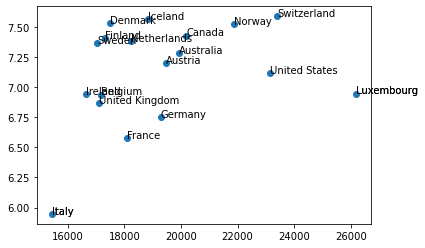

In [76]:
import matplotlib.pyplot as plt
plt.scatter(second['avg_income'],second['happyScore'])
#plt.scatter(first['avg_income'],first['happyScore'])
plt.text(second.iloc[-1]['avg_income'],
         second.iloc[-1]['happyScore'],
         second.iloc[-1]['country'])
plt.text(second.iloc[0]['avg_income'],
         second.iloc[0]['happyScore'],
         second.iloc[0]['country'])
for i,row in second.iterrows():
    plt.text(row['avg_income'],
            row['happyScore'],
            row['country'])

In [85]:
happy = first['happyScore']
income = first['avg_income']
ineq = first['income_inequality']
income.max()

26182.275

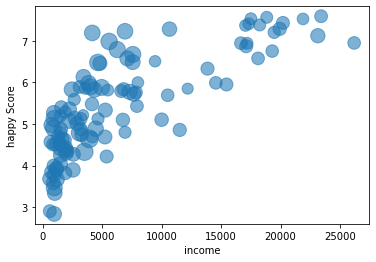

In [77]:
import matplotlib.pyplot as plt
plt.xlabel('income')
plt.ylabel('happy Score')
plt.scatter(income,happy,s = ineq*5,alpha = 0.57)

Text(0, 0.5, 'happy Score')

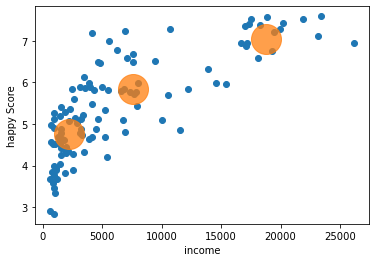

In [103]:
from sklearn.cluster import KMeans
import numpy as np
income_happy = np.column_stack((income,happy))
result = KMeans(n_clusters = 3).fit(income_happy)
cluster = result.cluster_centers_
plt.scatter(income,happy)
plt.scatter(cluster[:,0],cluster[:,1], s = 900,alpha = 0.75)
plt.xlabel('income')
plt.ylabel('happy Score')

